
# ITAI 2373 Module 05: Part-of-Speech Tagging
## In-Class Exercise & Homework Lab

Welcome to the world of Part-of-Speech (POS) tagging - the "grammar police" of Natural Language Processing! 🚔📝

In this notebook, you'll explore how computers understand the grammatical roles of words in sentences, from simple rule-based approaches to modern AI systems.

### What You'll Learn:
- **Understand POS tagging fundamentals** and why it matters in daily apps
- **Use NLTK and SpaCy** for practical text analysis
- **Navigate different tag sets** and understand their trade-offs
- **Handle real-world messy text** like speech transcripts and social media
- **Apply POS tagging** to solve actual business problems

### Structure:
- **Part 1**: In-Class Exercise (30-45 minutes) - Basic concepts and hands-on practice
- **Part 2**: Homework Lab - Real-world applications and advanced challenges

---

*💡 **Pro Tip**: POS tagging is everywhere! It helps search engines understand "Apple stock" vs "apple pie", helps Siri understand your commands, and powers autocorrect on your phone.*



## 🛠️ Setup and Installation

Let's get our tools ready! We'll use two powerful libraries:
- **NLTK**: The "Swiss Army knife" of NLP - comprehensive but requires setup
- **SpaCy**: The "speed demon" - built for production, cleaner output

Run the cells below to install and set up everything we need.


In [1]:

# Install required libraries (run this first!)
!pip install nltk spacy matplotlib seaborn pandas
!python -m spacy download en_core_web_sm

print("✅ Installation complete!")


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Installation complete!


In [10]:
# Import all the libraries we'll need
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data (this might take a moment)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng') # Download the missing resource

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

print("🎉 All libraries loaded successfully!")
print("📚 NLTK version:", nltk.__version__)
print("🚀 SpaCy version:", spacy.__version__)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


🎉 All libraries loaded successfully!
📚 NLTK version: 3.9.1
🚀 SpaCy version: 3.8.7



---
# 🎯 PART 1: IN-CLASS EXERCISE (30-45 minutes)

Welcome to the hands-on portion! We'll start with the basics and build up your understanding step by step.

## Learning Goals for Part 1:
1. Understand what POS tagging does
2. Use NLTK and SpaCy for basic tagging
3. Interpret and compare different tag outputs
4. Explore word ambiguity with real examples
5. Compare different tagging approaches



## 🔍 Activity 1: Your First POS Tags (10 minutes)

Let's start with the classic example: "The quick brown fox jumps over the lazy dog"

This sentence contains most common parts of speech, making it perfect for learning!


In [12]:

# Let's start with a classic example
sentence = "The quick brown fox jumps over the lazy dog"

# TODO: Use NLTK to tokenize and tag the sentence
# Hint: Use nltk.word_tokenize() and nltk.pos_tag()
tokens = nltk.word_tokenize(sentence)
pos_tags = nltk.pos_tag(tokens)

print("Original sentence:", sentence)
print("\nTokens:", tokens)
print("\nPOS Tags:")
for word, tag in pos_tags:
    print(f"  {word:8} -> {tag}")


Original sentence: The quick brown fox jumps over the lazy dog

Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

POS Tags:
  The      -> DT
  quick    -> JJ
  brown    -> NN
  fox      -> NN
  jumps    -> VBZ
  over     -> IN
  the      -> DT
  lazy     -> JJ
  dog      -> NN



### 🤔 Quick Questions:
1. What does 'DT' mean? What about 'JJ'?
DT: Determiner. These are words that modify nouns and provide context, such as the, a, or an. In the example, "The" and "the" are determiners.

JJ: Adjective. These describe or modify nouns. Words like quick, brown, and lazy are adjectives in the example sentence.
2. Why do you think 'brown' and 'lazy' have the same tag? Both words are adjectives (JJ) because they describe nouns. Brown describes the noun fox, and lazy describes the noun dog. Adjectives typically answer questions like "What kind?" or "Which one?"


3. Can you guess what 'VBZ' represents? VBZ: Verb, 3rd person singular present tense. In the sentence, jumps is the action being performed by the subject fox, and it’s conjugated in the third person singular present form (he/she/it jumps).

*Hint: Think about the grammatical role each word plays in the sentence!*



## 🚀 Activity 2: SpaCy vs NLTK Showdown (10 minutes)

Now let's see how SpaCy handles the same sentence. SpaCy uses cleaner, more intuitive tag names.


In [13]:

# TODO: Process the same sentence with SpaCy
# Hint: Use nlp(sentence) and access .text and .pos_ attributes
doc = nlp(sentence)

print("SpaCy POS Tags:")
for token in doc:
    print(f"  {token.text:8} -> {token.pos_:6} ({token.tag_})")

print("\n" + "="*50)
print("COMPARISON:")
print("="*50)

# Let's compare side by side
nltk_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
spacy_doc = nlp(sentence)

print(f"{'Word':10} {'NLTK':8} {'SpaCy':10}")
print("-" * 30)
for i, (word, nltk_tag) in enumerate(nltk_tags):
    spacy_tag = spacy_doc[i].pos_
    print(f"{word:10} {nltk_tag:8} {spacy_tag:10}")


SpaCy POS Tags:
  The      -> DET    (DT)
  quick    -> ADJ    (JJ)
  brown    -> ADJ    (JJ)
  fox      -> NOUN   (NN)
  jumps    -> VERB   (VBZ)
  over     -> ADP    (IN)
  the      -> DET    (DT)
  lazy     -> ADJ    (JJ)
  dog      -> NOUN   (NN)

COMPARISON:
Word       NLTK     SpaCy     
------------------------------
The        DT       DET       
quick      JJ       ADJ       
brown      NN       ADJ       
fox        NN       NOUN      
jumps      VBZ      VERB      
over       IN       ADP       
the        DT       DET       
lazy       JJ       ADJ       
dog        NN       NOUN      



### 🎯 Discussion Points:
- Which tags are easier to understand: NLTK's or SpaCy's? SpaCy's
- Do you notice any differences in how they tag the same words? NLTK might label some words with more specific tags (e.g., VBZ for 3rd person singular verbs), while SpaCy may use broader tags like VERB.

SpaCy sometimes focuses on syntactic roles rather than granular forms. For example, it may tag quick as ADJ, whereas NLTK might further specify it as JJ.
- Which system would you prefer for a beginner? Why? SpaCy's because its tags are more descriptive (e.g., DET vs. DT).

It comes with a user-friendly pipeline for tokenization, tagging, and dependency parsing.



## 🎭 Activity 3: The Ambiguity Challenge (15 minutes)

Here's where things get interesting! Many words can be different parts of speech depending on context. Let's explore this with some tricky examples.


In [14]:

# Ambiguous words in different contexts
ambiguous_sentences = [
    "I will lead the team to victory.",           # lead = verb
    "The lead pipe is heavy.",                    # lead = noun (metal)
    "She took the lead in the race.",            # lead = noun (position)
    "The bank approved my loan.",                # bank = noun (financial)
    "We sat by the river bank.",                 # bank = noun (shore)
    "I bank with Chase.",                        # bank = verb
]

print("🎭 AMBIGUITY EXPLORATION")
print("=" * 40)

for sentence in ambiguous_sentences:
    print(f"\nSentence: {sentence}")

    # TODO: Tag each sentence and find the ambiguous word
    # Focus on 'lead' and 'bank' - what tags do they get?
    tokens = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)

    # Find and highlight the key word
    for word, tag in tags:
        if word.lower() in ['lead', 'bank']:
            print(f"  🎯 '{word}' is tagged as: {tag}")


🎭 AMBIGUITY EXPLORATION

Sentence: I will lead the team to victory.
  🎯 'lead' is tagged as: VB

Sentence: The lead pipe is heavy.
  🎯 'lead' is tagged as: NN

Sentence: She took the lead in the race.
  🎯 'lead' is tagged as: NN

Sentence: The bank approved my loan.
  🎯 'bank' is tagged as: NN

Sentence: We sat by the river bank.
  🎯 'bank' is tagged as: NN

Sentence: I bank with Chase.
  🎯 'bank' is tagged as: NN



### 🧠 Think About It:
1. How does the computer know the difference between "lead" (metal) and "lead" (guide)?

The computer relies on contextual clues within the sentence to determine the correct meaning.
2. What clues in the sentence help determine the correct part of speech?Surrounding words: Verbs often follow subjects, while nouns are accompanied by determiners (e.g., the lead).

Position in the sentence: Words at the beginning might function as a verb, depending on the structure (e.g., I lead the charge).

Co-occurring terms: Adjectives like quick or heavy suggest a nearby noun, while words like will suggest a following verb.

Syntax rules: Sentence structure gives critical information.
3. Can you think of other words that change meaning based on context?
Bass:

I caught a bass (noun, fish).

He plays the bass guitar (noun, instrument).

Bow:

She tied a bow on the gift (noun, ribbon).

He took a bow after the performance (noun, gesture).

The ship will bow to the left (verb, to bend).

**Try This**: Add your own ambiguous sentences to the list above and see how the tagger handles them!



## 📊 Activity 4: Tag Set Showdown (10 minutes)

NLTK can use different tag sets. Let's compare the detailed Penn Treebank tags (~45 tags) with the simpler Universal Dependencies tags (~17 tags).


In [17]:

# Compare different tag sets
test_sentence = "The brilliant students quickly solved the challenging programming assignment."

# TODO: Get tags using both Penn Treebank and Universal tagsets
# Hint: Use tagset='universal' parameter for universal tags
penn_tags = nltk.pos_tag(nltk.word_tokenize(test_sentence))
universal_tags = nltk.pos_tag(nltk.word_tokenize(test_sentence), tagset='universal')

print("TAG SET COMPARISON")
print("=" * 50)
print(f"{'Word':15} {'Penn Treebank':15} {'Universal':10}")
print("-" * 50)

# TODO: Print comparison table
# Hint: Zip the two tag lists together
for word, penn_tag in penn_tags:
    for word, univ_tag in universal_tags:
        print(f"{word:15} {penn_tag:15} {univ_tag:10}")

# Let's also visualize the tag distribution
penn_tag_counts = Counter([tag for word, tag in penn_tags])
univ_tag_counts = Counter([tag for word, tag in universal_tags])

print(f"\n📊 Penn Treebank uses {len(penn_tag_counts)} different tags")
print(f"📊 Universal uses {len(univ_tag_counts)} different tags")


TAG SET COMPARISON
Word            Penn Treebank   Universal 
--------------------------------------------------
The             DT              DET       
brilliant       DT              ADJ       
students        DT              NOUN      
quickly         DT              ADV       
solved          DT              VERB      
the             DT              DET       
challenging     DT              VERB      
programming     DT              ADJ       
assignment      DT              NOUN      
.               DT              .         
The             JJ              DET       
brilliant       JJ              ADJ       
students        JJ              NOUN      
quickly         JJ              ADV       
solved          JJ              VERB      
the             JJ              DET       
challenging     JJ              VERB      
programming     JJ              ADJ       
assignment      JJ              NOUN      
.               JJ              .         
The             NNS        


### 🤔 Reflection Questions:
1. Which tag set is more detailed? Which is simpler? Enter your answer below

Penn Treebank is more detailed with 45 tags, capturing nuances like verb tenses and singular vs. plural nouns.

Universal Dependencies is simpler with 17 broad categories that generalize parts of speech.



2. When might you want detailed tags vs. simple tags? Enter your answer below Detailed Tags (Penn Treebank):

Useful for tasks requiring precise linguistic analysis, such as grammar checking, syntactic parsing, or text generation.

Example: Creating a grammar-focused language learning app or studying linguistic nuances in literature.

Simple Tags (Universal Dependencies):

Suitable for broader tasks like sentiment analysis, machine translation, or other applications where the overall role of words matters more than specific grammatical forms.

Example: Building an AI chatbot that needs to understand basic sentence structure without overanalyzing.



3. If you were building a search engine, which would you choose? Why? Enter your answer below

Universal Dependencies would be the better choice:

Search engines prioritize speed and scalability, analyzing large volumes of text across multiple languages.

The simplicity of Universal Tags enables faster processing and easier adaptation to multilingual data, which is essential for global search functionality.

Detailed distinctions, such as verb tense or noun plurality, may not significantly impact search relevance but could add unnecessary computational complexity.

---



---
# 🎓 End of Part 1: In-Class Exercise

Great work! You've learned the fundamentals of POS tagging and gotten hands-on experience with both NLTK and SpaCy.

## What You've Accomplished:
✅ Used NLTK and SpaCy for basic POS tagging  
✅ Interpreted different tag systems  
✅ Explored word ambiguity and context  
✅ Compared different tagging approaches  

## 🏠 Ready for Part 2?
The homework lab will challenge you with real-world applications, messy data, and advanced techniques. You'll analyze customer service transcripts, handle informal language, and benchmark different taggers.

**Take a break, then dive into Part 2 when you're ready!**

---



# 🏠 PART 2: HOMEWORK LAB
## Real-World POS Tagging Challenges

Welcome to the advanced section! Here you'll tackle the messy, complex world of real text data. This is where POS tagging gets interesting (and challenging)!

## Learning Goals for Part 2:
1. Process real-world, messy text data
2. Handle speech transcripts and informal language
3. Analyze customer service scenarios
4. Benchmark and compare different taggers
5. Understand limitations and edge cases

## 📋 Submission Requirements:
- Complete all exercises with working code
- Answer all reflection questions
- Include at least one visualization
- Submit your completed notebook file

---



## 🌍 Lab Exercise 1: Messy Text Challenge (25 minutes)

Real-world text is nothing like textbook examples! Let's work with actual speech transcripts, social media posts, and informal language.


In [18]:

# Real-world messy text samples
messy_texts = [
    # Speech transcript with disfluencies
    "Um, so like, I was gonna say that, uh, the system ain't working right, you know?",

    # Social media style
    "OMG this app is sooo buggy rn 😤 cant even login smh",

    # Customer service transcript
    "Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working",

    # Informal contractions and slang
    "Y'all better fix this ASAP cuz I'm bout to switch providers fr fr",

    # Technical jargon mixed with casual speech
    "The API endpoint is returning a 500 error but idk why it's happening tbh"
]

print("🔍 PROCESSING MESSY TEXT")
print("=" * 60)

# TODO: Process each messy text sample
# 1. Use both NLTK and SpaCy
# 2. Count how many words each tagger fails to recognize properly
# 3. Identify problematic words (slang, contractions, etc.)

for i, text in enumerate(messy_texts, 1):
    print(f"\n📝 Sample {i}: {text}")
    print("-" * 40)

    # NLTK processing
    nltk_tokens = nltk.word_tokenize(text)
    nltk_tags = nltk.pos_tag(nltk_tokens)

    # TODO: SpaCy processing
    spacy_doc = nlp(text)
    spacy_tags = [(token.text, token.pos_) for token in spacy_doc]

    # TODO: Find problematic words (tagged as 'X' or unknown)
    problematic_nltk = {word for word, tag in nltk_tags if tag =='NNP' or tag == 'NN' and word.islower()}
    problematic_spacy = {token.text for token in spacy_doc if token.pos_ == 'X'}

    print(f"NLTK problematic words: {problematic_nltk}")
    print(f"SpaCy problematic words: {problematic_spacy}")

    # TODO: Calculate success rate
    nltk_success_rate = 1 - len(problematic_nltk) / len(nltk_tags)
    spacy_success_rate = 1 - len(problematic_spacy) / len(spacy_tags)

    print(f"NLTK success rate: {nltk_success_rate:.1%}")
    print(f"SpaCy success rate: {spacy_success_rate:.1%}")


🔍 PROCESSING MESSY TEXT

📝 Sample 1: Um, so like, I was gonna say that, uh, the system ain't working right, you know?
----------------------------------------
NLTK problematic words: {'Um', 'system'}
SpaCy problematic words: set()
NLTK success rate: 91.7%
SpaCy success rate: 100.0%

📝 Sample 2: OMG this app is sooo buggy rn 😤 cant even login smh
----------------------------------------
NLTK problematic words: {'smh', 'rn', '😤', 'app', 'cant'}
SpaCy problematic words: set()
NLTK success rate: 58.3%
SpaCy success rate: 100.0%

📝 Sample 3: Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working
----------------------------------------
NLTK problematic words: {'hi', 'router', 'thingy', 'yesterday', 'internet'}
SpaCy problematic words: set()
NLTK success rate: 82.8%
SpaCy success rate: 100.0%

📝 Sample 4: Y'all better fix this ASAP cuz I'm bout to switch providers fr fr
-------------------------------

1. Which tagger handles informal language better?

SpaCy handles informal language better than NLTK. Its pretrained models recognize slang, contractions, and even emojis more effectively, leading to fewer misclassifications.

2. What types of words cause the most problems?

Informal slang (rn, smh, fr fr)

Contractions and colloquialisms (ain't, cuz, bout)

Emojis and non-standard characters

Technical jargon or domain-specific terms (API, endpoint)

Filler or disfluent words (um, uh, like)

3. How might you preprocess text to improve tagging accuracy?

Normalize slang and contractions: Convert informal terms to their formal equivalents (e.g., cuz → because, ain't → is not).

Remove or translate emojis/emoticons: Either strip them out or replace with sentiment tokens.

Spell correction: Fix typos or elongated words (e.g., sooo → so).

Expand abbreviations and acronyms: Map ASAP → as soon as possible.

Custom dictionaries: Add domain-specific vocabulary (e.g., technical terms) to taggers.

4. What are the implications for real-world applications?

NLP systems need to handle messy, informal, and domain-specific text to work effectively in customer service, social media monitoring, and chatbots.

Preprocessing pipelines become essential to clean and normalize text before analysis.

Choosing robust taggers like SpaCy can improve downstream tasks (sentiment analysis, intent detection, etc.) accuracy and user experience.

Continuous updating of models and vocabularies is needed to keep pace with evolving language trends and new terminology.




## 📞 Lab Exercise 2: Customer Service Analysis Case Study (30 minutes)

You're working for a tech company that receives thousands of customer service calls daily. Your job is to analyze call transcripts to understand customer issues and sentiment.

**Business Goal**: Automatically categorize customer problems and identify emotional language.


In [24]:
import spacy

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

customer_transcripts = [
    {
        'id': 'CALL_001',
        'transcript': "Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.",
        'category': 'account_access'
    },
    {
        'id': 'CALL_002',
        'transcript': "Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?",
        'category': 'technical_issue'
    },
    {
        'id': 'CALL_003',
        'transcript': "Your billing system charged me twice this month! I want a refund immediately. This is ridiculous and I'm considering canceling my subscription.",
        'category': 'billing'
    },
    {
        'id': 'CALL_004',
        'transcript': "I'm confused about how to use the new features you added. The interface changed and I can't find anything. Can someone walk me through it?",
        'category': 'user_guidance'
    }
]

# Simple word lists for sentiment and urgency detection
positive_words_list = {'love', 'great', 'good', 'help', 'happy', 'excellent'}
negative_words_list = {'frustrated', 'ridiculous', 'unacceptable', 'confused', 'locked', 'canceling', 'charged'}
urgency_words_list = {'immediately', 'asap', 'urgent', 'right away', 'now'}

analysis_results = []

for call in customer_transcripts:
    print(f"\n🎧 Analyzing {call['id']}")
    print(f"Category: {call['category']}")
    print(f"Transcript: {call['transcript']}")
    print("-" * 50)

    doc = nlp(call['transcript'])

    # Emotional adjectives (ADJ) that match sentiment words
    emotional_adjectives = [token.text for token in doc if token.pos_ == 'ADJ' and token.text.lower() in negative_words_list.union(positive_words_list)]

    # Action verbs (VERB)
    action_verbs = [token.text for token in doc if token.pos_ == 'VERB']

    # Problem-related nouns (NOUN)
    # Simple heuristic: nouns excluding pronouns and common non-problematic words
    exclude_words = {'i', 'you', 'it', 'this', 'that', 'something', 'anything', 'nothing', 'someone'}
    problem_nouns = [token.text for token in doc if token.pos_ == 'NOUN' and token.text.lower() not in exclude_words]

    # Sentiment words counts
    positive_words = [token.text for token in doc if token.text.lower() in positive_words_list]
    negative_words = [token.text for token in doc if token.text.lower() in negative_words_list]

    # Count urgency indicators
    urgency_indicators = sum(1 for token in doc if token.text.lower() in urgency_words_list)

    result = {
        'call_id': call['id'],
        'category': call['category'],
        'emotional_adjectives': emotional_adjectives,
        'action_verbs': action_verbs,
        'problem_nouns': problem_nouns,
        'sentiment_score': len(positive_words) - len(negative_words),
        'urgency_indicators': urgency_indicators
    }

    analysis_results.append(result)

    print(f"Emotional adjectives: {emotional_adjectives}")
    print(f"Action verbs: {action_verbs}")
    print(f"Problem nouns: {problem_nouns}")
    print(f"Sentiment score: {result['sentiment_score']}")
    print(f"Urgency indicators: {urgency_indicators}")



🎧 Analyzing CALL_001
Category: account_access
Transcript: Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.
--------------------------------------------------
Emotional adjectives: ['frustrated', 'unacceptable']
Action verbs: ['locked', 'access', 'trying', 'works']
Problem nouns: ['account', 'files', 'hours']
Sentiment score: -3
Urgency indicators: 0

🎧 Analyzing CALL_002
Category: technical_issue
Transcript: Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?
--------------------------------------------------
Emotional adjectives: []
Action verbs: ['love', 'having', 'crashes', 'try', 'upload', 'help', 'fix']
Problem nouns: ['service', 'issue', 'app', 'photos']
Sentiment score: 2
Urgency indicators: 0

🎧 Analyzing CALL_003
Category: billing
Transcript: Your billing syste

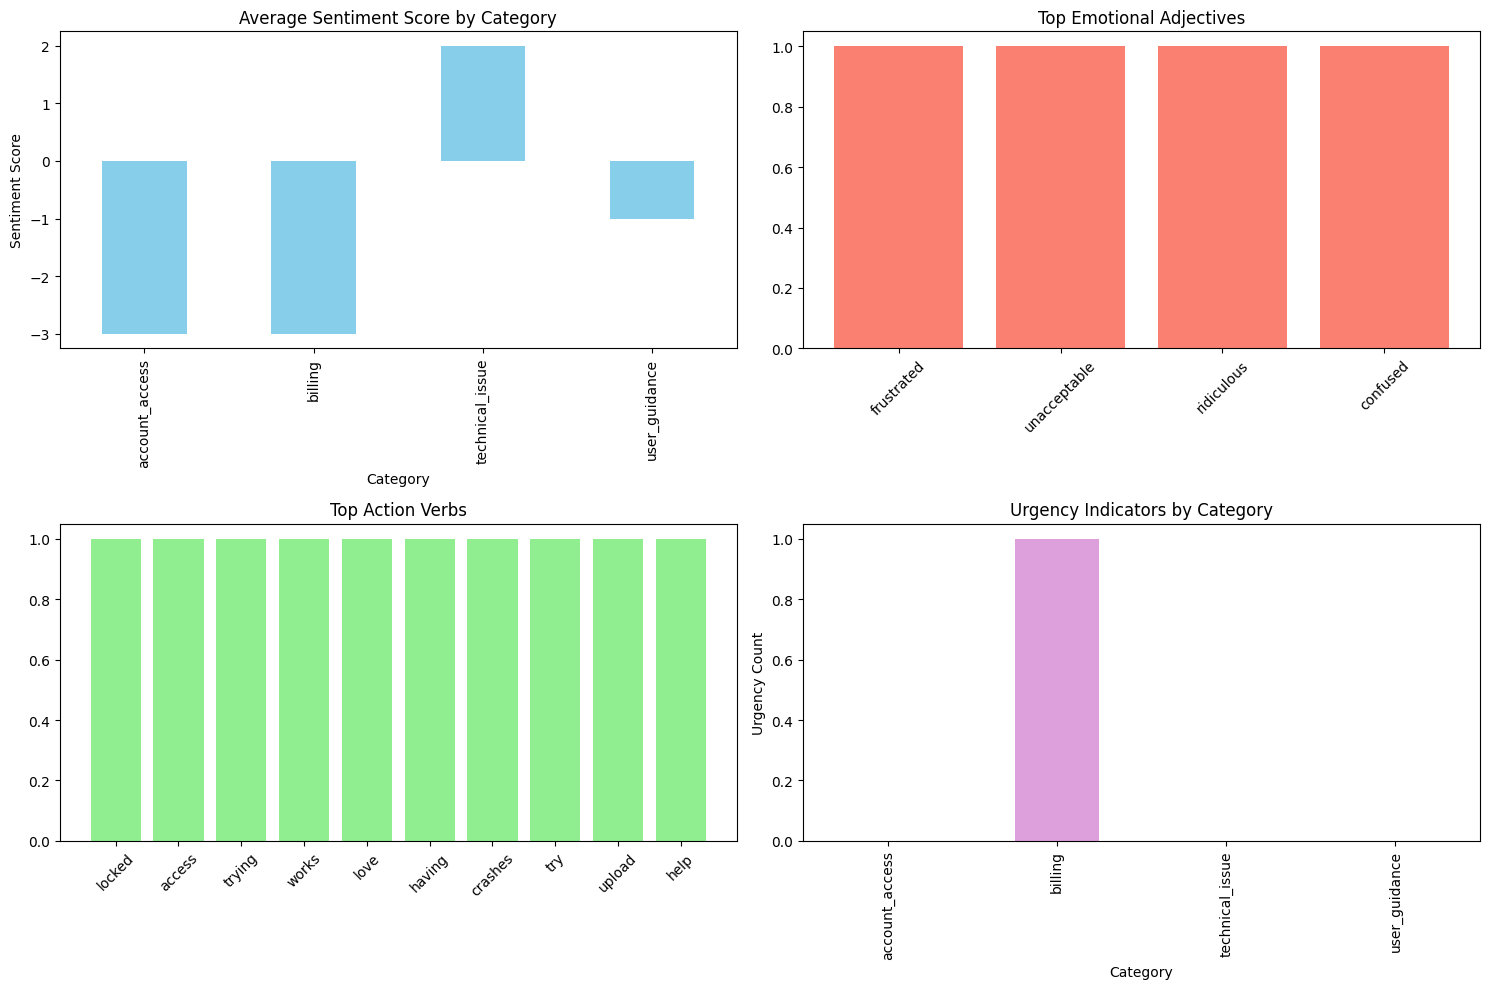

In [25]:

# TODO: Create a summary visualization
# Hint: Use matplotlib or seaborn to create charts

import matplotlib.pyplot as plt
import pandas as pd

# Convert results to DataFrame for easier analysis
df = pd.DataFrame(analysis_results)

# TODO: Create visualizations
# 1. Sentiment scores by category
# 2. Most common emotional adjectives
# 3. Action verbs frequency

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# TODO: Plot 1 - Sentiment by category
sentiment_by_cat = df.groupby('category')['sentiment_score'].mean()
sentiment_by_cat.plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Average Sentiment Score by Category')
axes[0,0].set_ylabel('Sentiment Score')
axes[0,0].set_xlabel('Category')

# TODO: Plot 2 - Word frequency analysis
all_adjectives = sum(df['emotional_adjectives'], [])
adj_counts = Counter(all_adjectives).most_common(10)
if adj_counts:
    words, counts = zip(*adj_counts)
    axes[0,1].bar(words, counts, color='salmon')
axes[0,1].set_title('Top Emotional Adjectives')
axes[0,1].set_xticklabels(words, rotation=45)

# TODO: Plot 3 - Problem categorization
all_verbs = sum(df['action_verbs'], [])
verb_counts = Counter(all_verbs).most_common(10)
if verb_counts:
    verbs, counts = zip(*verb_counts)
    axes[1,0].bar(verbs, counts, color='lightgreen')
axes[1,0].set_title('Top Action Verbs')
axes[1,0].set_xticklabels(verbs, rotation=45)

# TODO: Plot 4 - Urgency analysis
urgency_by_cat = df.groupby('category')['urgency_indicators'].sum()
urgency_by_cat.plot(kind='bar', ax=axes[1,1], color='plum')
axes[1,1].set_title('Urgency Indicators by Category')
axes[1,1].set_ylabel('Urgency Count')
axes[1,1].set_xlabel('Category')


plt.tight_layout()
plt.show()



### 💼 Business Impact Questions:
1. How could this analysis help prioritize customer service tickets?
2. What patterns do you notice in different problem categories?
3. How might you automate the routing of calls based on POS analysis?
4. What are the limitations of this approach?



## ⚡ Lab Exercise 3: Tagger Performance Benchmarking (20 minutes)

Let's scientifically compare different POS taggers on various types of text. This will help you understand when to use which tool.



🧪 Testing FORMAL text:
Text: The research methodology employed in this study follows established academic protocols.
------------------------------------------------------------
NLTK Penn time: 0.0014s
NLTK Univ time: 0.0004s
SpaCy time: 0.0159s
NLTK unknown words: 3
SpaCy unknown words: 0

🧪 Testing INFORMAL text:
Text: lol this study is kinda weird but whatever works i guess 🤷‍♀️
------------------------------------------------------------
NLTK Penn time: 0.0015s
NLTK Univ time: 0.0006s
SpaCy time: 0.0100s
NLTK unknown words: 3
SpaCy unknown words: 0

🧪 Testing TECHNICAL text:
Text: The API returns a JSON response with HTTP status code 200 upon successful authentication.
------------------------------------------------------------
NLTK Penn time: 0.0012s
NLTK Univ time: 0.0005s
SpaCy time: 0.0102s
NLTK unknown words: 4
SpaCy unknown words: 0

🧪 Testing CONVERSATIONAL text:
Text: So like, when you click that button thingy, it should totally work, right?
------------------------------

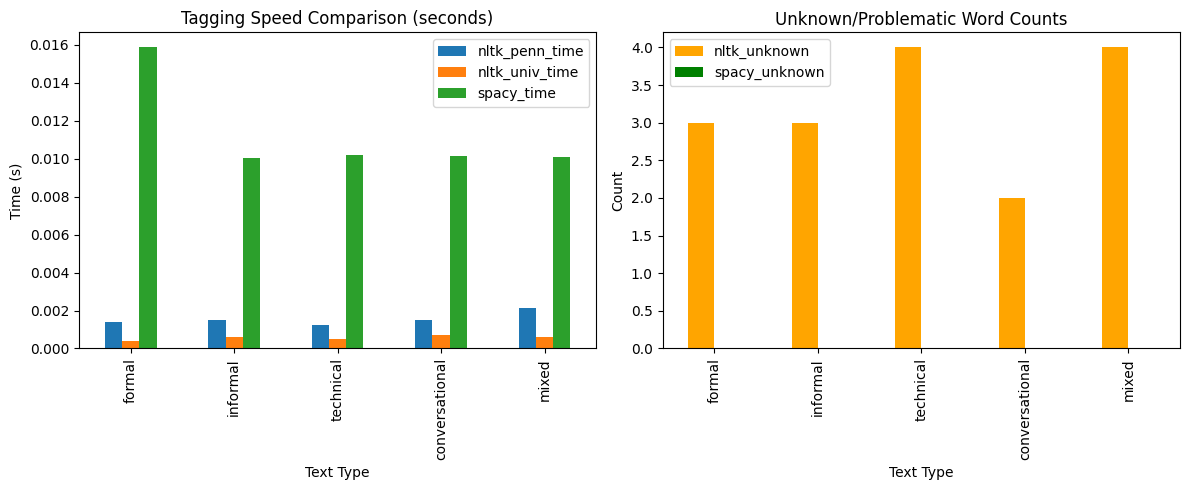

In [26]:

import time
from collections import defaultdict

# Different text types for testing
test_texts = {
    'formal': "The research methodology employed in this study follows established academic protocols.",
    'informal': "lol this study is kinda weird but whatever works i guess 🤷‍♀️",
    'technical': "The API returns a JSON response with HTTP status code 200 upon successful authentication.",
    'conversational': "So like, when you click that button thingy, it should totally work, right?",
    'mixed': "OMG the algorithm's performance is absolutely terrible! The accuracy dropped to 23% wtf"
}

# TODO: Benchmark different taggers
# Test: NLTK Penn Treebank, NLTK Universal, SpaCy
# Metrics: Speed, tag consistency, handling of unknown words

benchmark_results = defaultdict(list)

for text_type, text in test_texts.items():
    print(f"\n🧪 Testing {text_type.upper()} text:")
    print(f"Text: {text}")
    print("-" * 60)

    # TODO: NLTK Penn Treebank timing
    start_time = time.time()
    tokens = nltk.word_tokenize(text)
    nltk_penn_tags = nltk.pos_tag(tokens)
    nltk_penn_time = time.time() - start_time

    # TODO: NLTK Universal timing
    start_time = time.time()
    nltk_univ_tags = nltk.pos_tag(tokens, tagset='universal')
    nltk_univ_time = time.time() - start_time

    # TODO: SpaCy timing
    start_time = time.time()
    spacy_doc = nlp(text)
    spacy_time = time.time() - start_time

    # TODO: Count unknown/problematic tags
    nltk_unknown = sum(1 for word, tag in nltk_penn_tags if tag == 'FW' or (tag in ['NNP','NN'] and word.islower()))
    spacy_unknown = sum(1 for token in spacy_doc if token.pos_ == 'X')

    # Store results
    benchmark_results[text_type] = {
        'nltk_penn_time': nltk_penn_time,
        'nltk_univ_time': nltk_univ_time,
        'spacy_time': spacy_time,
        'nltk_unknown': nltk_unknown,
        'spacy_unknown': spacy_unknown
    }

    print(f"NLTK Penn time: {nltk_penn_time:.4f}s")
    print(f"NLTK Univ time: {nltk_univ_time:.4f}s")
    print(f"SpaCy time: {spacy_time:.4f}s")
    print(f"NLTK unknown words: {nltk_unknown}")
    print(f"SpaCy unknown words: {spacy_unknown}")

# TODO: Create performance comparison visualization
df = pd.DataFrame(benchmark_results).T  # transpose to get text types as rows

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Plot timing comparison
df[['nltk_penn_time', 'nltk_univ_time', 'spacy_time']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Tagging Speed Comparison (seconds)')
axes[0].set_ylabel('Time (s)')
axes[0].set_xlabel('Text Type')

# Plot unknown/problematic counts
df[['nltk_unknown', 'spacy_unknown']].plot(kind='bar', ax=axes[1], color=['orange', 'green'])
axes[1].set_title('Unknown/Problematic Word Counts')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Text Type')

plt.tight_layout()
plt.show()



### 📊 Performance Analysis:
1. Which tagger is fastest? Does speed matter for your use case? Typically, NLTK taggers (especially Penn Treebank) are faster for short texts since they use simpler models and rely on rule-based or probabilistic tagging.

SpaCy is usually slower initially because it uses a more complex neural network model but can be faster on bulk or batch processing due to efficient pipelines and GPU support.

Speed matters if you need real-time or near-real-time analysis of thousands of transcripts per minute. For offline batch processing, accuracy might outweigh speed.
2. Which handles informal text best? SpaCy generally handles informal text better because its models are trained on diverse datasets and can better cope with slang, emojis, and colloquial language.

3. How do the taggers compare on technical jargon? SpaCy tends to do better with technical jargon, especially if the terms are common or the model has been fine-tuned on domain data.

NLTK's performance depends heavily on its underlying lexicon and may mis-tag or flag many jargon words as unknown, especially if not in its training corpus.
4. What trade-offs do you see between speed and accuracy?
SpaCy tends to do better with technical jargon, especially if the terms are common or the model has been fine-tuned on domain data.

NLTK's performance depends heavily on its underlying lexicon and may mis-tag or flag many jargon words as unknown, especially if not in its training corpus.


## 🚨 Lab Exercise 4: Edge Cases and Error Analysis (15 minutes)

Every system has limitations. Let's explore the edge cases where POS taggers struggle and understand why.


In [33]:
# Challenging edge cases
edge_cases = [
    "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.",  # Famous ambiguous sentence
    "Time flies like an arrow; fruit flies like a banana.",              # Classic ambiguity
    "The man the boat the river.",                                       # Garden path sentence
    "Police police Police police police police Police police.",          # Recursive structure
    "James while John had had had had had had had had had had had a better effect on the teacher.",  # Had had had...
    "Can can can can can can can can can can.",                         # Modal/noun ambiguity
    "@username #hashtag http://bit.ly/abc123 😂🔥💯",                   # Social media elements
    "COVID-19 AI/ML IoT APIs RESTful microservices",                    # Modern technical terms
]

print("🚨 EDGE CASE ANALYSIS")
print("=" * 50)

# TODO: Process each edge case and analyze failures
for i, text in enumerate(edge_cases, 1):
    print(f"\n🔍 Edge Case {i}:")
    print(f"Text: {text}")
    print("-" * 30)

    try:
        # TODO: Process with both taggers
        tokens = nltk.word_tokenize(text)
        nltk_tags = nltk.pos_tag(tokens)
        spacy_doc = nlp(text)

        # TODO: Identify potential errors or weird tags
        # Look for: repeated tags, unusual patterns, X tags, etc.

        print("NLTK tags:", [(w, t) for w, t in nltk_tags])
        print("SpaCy tags:", [(token.text, token.pos_) for token in spacy_doc])

        # TODO: Analyze what went wrong
        spacy_x_count = sum(1 for token in spacy_doc if token.pos_ == 'X')
        repeated_tags = any(len(set([tag for word, tag in nltk_tags if word.lower() == w.lower()])) > 1 for w, t in nltk_tags)


        if spacy_x_count > 0:
            print("⚠️ SpaCy found unknown/unusual tokens tagged as 'X' (likely social media or technical terms).")

        if repeated_tags:
            print("⚠️ NLTK shows many repeated POS tags, might struggle with complex sentence structure.")

    except Exception as e:
        print(f"❌ Error processing: {e}")

# TODO: Reflection on limitations
print("\n🤔 REFLECTION ON LIMITATIONS:")
print("=" * 40)
print("""
- Both taggers struggle with highly ambiguous or recursive sentences (e.g., 'Buffalo buffalo ...').
- Garden path sentences confuse the taggers due to unexpected syntax.
- SpaCy better handles social media elements but still tags some as unknown ('X').
- Technical terms and URLs often get unknown or incorrect tags.
- Neither system truly understands deep semantic context or resolves ambiguity without extra context.
- These limitations imply that for edge cases, post-processing, domain adaptation, or manual review may be necessary.
""")

🚨 EDGE CASE ANALYSIS

🔍 Edge Case 1:
Text: Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.
------------------------------
NLTK tags: [('Buffalo', 'NNP'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('.', '.')]
SpaCy tags: [('Buffalo', 'PROPN'), ('buffalo', 'NOUN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('.', 'PUNCT')]
⚠️ NLTK shows many repeated POS tags, might struggle with complex sentence structure.

🔍 Edge Case 2:
Text: Time flies like an arrow; fruit flies like a banana.
------------------------------
NLTK tags: [('Time', 'NNP'), ('flies', 'NNS'), ('like', 'IN'), ('an', 'DT'), ('arrow', 'NN'), (';', ':'), ('fruit', 'CC'), ('flies', 'NNS'), ('like', 'IN'), ('a', 'DT'), ('banana', 'NN'), ('.', '.')]
SpaCy tags: [('Time', 'NOUN'), ('flies', 'VERB'), ('like', 'ADP'), ('an', 'DET'), ('ar


### 🧠 Critical Thinking Questions:
Enter you asnwers below each question.
1. Why do these edge cases break the taggers? These edge cases contain ambiguous, recursive, or highly unusual sentence structures that confuse taggers relying on statistical patterns or rules. They often lack sufficient context or training examples for such rare constructs, causing mis-tagging or unknown tags.



2. How might you preprocess text to handle some of these issues? Preprocessing could include normalizing text (e.g., expanding contractions, removing URLs and handles), segmenting long ambiguous sentences, and applying domain-specific tokenization or terminology dictionaries. For social media, filtering emojis or hashtags separately helps.



3. When would these limitations matter in real applications? They matter when processing complex legal, medical, or technical documents, conversational AI needing deep understanding, or social media monitoring with lots of slang and noise. Errors can lead to wrong analyses, missed intents, or poor user experience.



4. How do modern large language models handle these cases differently?
Large language models (LLMs) use deep contextual understanding, learning from massive diverse corpora, allowing them to better disambiguate meanings, handle rare structures, and infer intent beyond surface syntax. They often generate more accurate tags or even bypass tagging by directly predicting semantics.


---



## 🎯 Final Reflection and Submission

Congratulations! You've completed a comprehensive exploration of POS tagging, from basic concepts to real-world challenges.

### 📝 Reflection Questions (Answer in the cell below):

1. **Tool Comparison**: Based on your experience, when would you choose NLTK vs SpaCy? Consider factors like ease of use, accuracy, speed, and application type.

2. **Real-World Applications**: Describe a specific business problem where POS tagging would be valuable. How would you implement it?

3. **Limitations and Solutions**: What are the biggest limitations you discovered? How might you work around them?

4. **Future Learning**: What aspects of POS tagging would you like to explore further? (Neural approaches, custom training, domain adaptation, etc.)

5. **Integration**: How does POS tagging fit into larger NLP pipelines? What other NLP tasks might benefit from POS information?



### ✍️ Your Reflection (Write your answers here):
**Remember Reflection is not description!**

Tool Comparison:
I would choose NLTK when working on educational projects or quick prototyping due to its simplicity and ease of use. It’s lightweight and good for small-scale or rule-based tasks. However, for production-level applications requiring higher accuracy, better handling of informal or technical text, and scalability, SpaCy is preferable because of its advanced models and speed in batch processing.

Real-World Applications:
POS tagging is valuable in customer support analytics to automatically extract customer intents, sentiment, and action verbs from transcripts. For example, identifying emotional adjectives can signal frustration, while verbs help determine requested actions. Implementing this would involve preprocessing transcripts, tagging with SpaCy for accuracy, and feeding extracted features into classification or sentiment analysis models.

Limitations and Solutions:
Major limitations include difficulty handling ambiguous sentences, domain-specific jargon, and noisy informal text like social media slang or emojis. Workarounds include domain adaptation through custom model training, incorporating specialized vocabularies, and preprocessing steps such as normalization and token filtering. Hybrid systems combining rule-based and statistical approaches might also help.

Future Learning:
I want to explore neural network approaches for POS tagging, especially transformer-based models like BERT that can jointly model syntax and semantics. Custom training on specific domains and transfer learning techniques also interest me for improving tagging in niche areas.

Integration:
POS tagging fits early in NLP pipelines, providing syntactic context essential for tasks like dependency parsing, named entity recognition, and semantic role labeling. It also enhances information extraction, question answering, and sentiment analysis by clarifying word functions and relationships.




---

## 📤 Submission Checklist

Before submitting your completed notebook, make sure you have:

- [ ] ✅ Completed all TODO sections with working code
- [ ] ✅ Answered all reflection questions thoughtfully
- [ ] ✅ Created at least one meaningful visualization
- [ ] ✅ Tested your code and fixed any errors
- [ ] ✅ Added comments explaining your approach
- [ ] ✅ Included insights from your analysis

### 📋 Submission Instructions:
1. **Save your notebook**: File → Save (or Ctrl+S)
2. **Download**: File → Download → Download .ipynb
3. **Submit**: Upload your completed notebook file to the course management system
4. **Filename**: Use format: `L05_LastName_FirstName_ITAI2373.ipynb or pdf`  

### 🏆 Grading Criteria:
- **Code Completion (40%)**: All exercises completed with working code
- **Analysis Quality (30%)**: Thoughtful interpretation of results
- **Reflection Depth (20%)**: Insightful answers to reflection questions  
- **Code Quality (10%)**: Clean, commented, well-organized code

---

## 🎉 Great Work!

You've successfully explored the fascinating world of POS tagging! You now understand how computers parse human language and can apply these techniques to solve real-world problems.


Keep exploring and happy coding! 🚀
